<a href="https://colab.research.google.com/github/Kaustubh-Amare/-EDA_CAPSTONE_Playstore_-_Userdata/blob/main/playstore_data_analysis_kau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
playstore_df_path = '/content/drive/MyDrive/DATA_SCI_almabetter/Module_1/drive_data/playstore_reviews/Play Store Data.csv'
playstore_df= pd.read_csv(playstore_df_path)

In [4]:
user_review_path = '/content/drive/MyDrive/DATA_SCI_almabetter/Module_1/drive_data/playstore_reviews/User Reviews.csv'
user_review_df = pd.read_csv(user_review_path)

In [5]:
playstore_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Step- 0 :- Make a copy of data frame

In [7]:
wk_ps_df= playstore_df.copy()               # wk_ps_df= working playstore dataframe

In [8]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Step-01 :- Need to change some data forms so as to get more data insights,
primarily changing some data formats from object to int.

In [9]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# wk_ps_df['Reviews']= wk_ps_df['Reviews'].astype('int')      

In [11]:
# finding the this entry of 3.0M preventing conversion
wk_ps_df[wk_ps_df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
''' This above Entry no_ 10472 searched for mistaked entry of 3.0M in Review column have lots of misentered data in multiple columns like
in Genres Ratings, category this might affect the further EDA and typeconversion, thus dropping this column   ''' 

wk_ps_df.drop([10472] , inplace= True )
wk_ps_df[10471:10476]                                                # Row 10472 droppd successfully.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


In [13]:
wk_ps_df['Reviews']= wk_ps_df['Reviews'].astype('int')  # reviews datatype is successfully converted to int

In [14]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [15]:
# to convert installs column from object to int
wk_ps_df['Installs_']=wk_ps_df['Installs'].str.replace(',','') 
wk_ps_df['Installs__']=wk_ps_df['Installs_'].str.replace('+','') 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000+,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000+,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000+,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000+,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000+,100000


In [17]:
wk_ps_df['Installs__']= wk_ps_df['Installs__'].astype('int')

In [18]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000+,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000+,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000+,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000+,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000+,100000


In [19]:
wk_ps_df.drop(['Installs', 'Installs_'], axis = 1, inplace = True)

In [20]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs__
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [21]:
wk_ps_df.rename(columns={'Installs__': 'Installs'},
          inplace=True)                                       # Installs column successfully changed from object to int

In [22]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [23]:
# working on size column

for size in wk_ps_df['Size'].unique():
  print(size)                                 # there is various kind of format in data, need a funtion to homoginize it.

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [24]:
# making function for size column data conversion.

def size_formatting(size):
  if size[-1]== 'M':
    size= size[:-1]
    return size
    # print(size)

  elif size[-1]=='k':
    size= float(size[:-1])/1024
    return size
    # print(size)  

  elif size=='1,000+':
    size= 1.0
    return size
    # print (size)

  else:
    size= np.nan
    return size
    

In [25]:
wk_ps_df['Size']= wk_ps_df['Size'].apply(size_formatting)

In [26]:
wk_ps_df.rename(columns={'Size': 'Size(in MB)'},
          inplace=True)                                         

In [27]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [28]:
wk_ps_df.tail()                                                          

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,100
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,10000000


In [29]:
wk_ps_df['Size(in MB)']= wk_ps_df['Size(in MB)'].astype('float')       # size column data conversion done successfully

In [30]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(in MB)     9145 non-null   float64
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Installs        10840 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [31]:
# converting Price from object to float 
wk_ps_df['Price'].unique()                  

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [32]:
def price_formatting(price):
  if price[0]=="$":
    return price[1:]
  else:
    return 0.0

In [33]:
wk_ps_df['Price']= wk_ps_df['Price'].apply(price_formatting)

In [34]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [35]:
wk_ps_df['Price']= wk_ps_df['Price'].astype('float')

In [36]:
wk_ps_df.rename(columns={'Price': 'Price (in $)'},
          inplace=True)                                           # Price is converted from object to column

In [37]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(in MB)     9145 non-null   float64
 5   Type            10839 non-null  object 
 6   Price (in $)    10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Installs        10840 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [99]:
def name_fromatting(stri_ng):
  return stri_ng.replace(' ','_')
  

'bad_banana'

In [38]:
wk_ps_df.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [39]:
wk_ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [40]:
# Converting Category column from object to string
wk_ps_df['Category']= wk_ps_df['Category'].astype('string')

In [41]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  string 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(in MB)     9145 non-null   float64
 5   Type            10839 non-null  object 
 6   Price (in $)    10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Installs        10840 non-null  int64  
dtypes: float64(3), int64(2), object(7), string(1)
memory usage: 1.2+ MB


In [42]:
# data type of all required columns are changed succesfully 

Step 2:- Data wrangling and data visualization

In [43]:
wk_ps_df.describe()                             # many insights can be estimated using the numbers.

,Rating,Reviews,Size(in MB),Price (in $),Installs
count,9366.000000,1.084000e+04,9145.000000,10840.000000,1.084000e+04
mean,4.191757,4.441529e+05,21.516165,1.027368,1.546434e+07
std,0.515219,2.927761e+06,22.589084,15.949703,8.502936e+07
min,1.000000,0.000000e+00,0.008301,0.000000,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,0.000000,1.000000e+03
50%,4.300000,2.094000e+03,13.000000,0.000000,1.000000e+05
75%,4.500000,5.477550e+04,30.000000,0.000000,5.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,1.000000e+09


Questions:
1. If a developer wants to make an app in gaming genre, what app_size do you suggest?
2. If developer want to make an app of content creation what will be the app_size you will suggest?
3. How many apps are there for educational category?
4. what are the top 10 categories apps.
5. which are highest installed apps.
6. which are highest rated apps.


In [120]:
#for finding top 10 apps by Sizes
wk_ps_df.sort_values(by='Size(in MB)', axis=0, ascending=0, inplace=False)[0:11]

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up,5000000
5427,Ultimate Tennis,SPORTS,4.3,183004,100.0,Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up,10000000
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,100000000
7404,SimCity BuildIt,FAMILY,4.5,4218587,100.0,Free,0.00,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up,50000000
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,Free,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up,10000000
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,Free,0.00,Everyone,Sports,"May 11, 2018",25.7,4.1 and up,5000000
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up,1000000
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,Paid,0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,1000000
1080,Post Bank,FINANCE,4.5,60449,100.0,Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up,1000000
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,Free,0.00,Everyone,Racing,"May 20, 2018",1.03,4.1 and up,10000


In [121]:
# top 10 highly Rated Apps
wk_ps_df.sort_values(by='Installs', axis=0, ascending=0, inplace=False)[0:100]

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
3896,Subway Surfers,GAME,4.5,27711703,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
3943,Facebook,SOCIAL,4.1,78128208,NaN,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
3523,Google Drive,PRODUCTIVITY,4.4,2731211,NaN,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,1000000000
3565,Google Drive,PRODUCTIVITY,4.4,2731211,NaN,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,NaN,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device,500000000
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17.0,Free,0.0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up,500000000
1751,Candy Crush Saga,GAME,4.4,22428456,74.0,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,500000000
4222,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,500000000


In [122]:
# top 10 highly reviewd apps
wk_ps_df.sort_values(by='Reviews', axis=0, ascending=0, inplace=False)[0:11]

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
2544,Facebook,SOCIAL,4.1,78158306,NaN,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
3943,Facebook,SOCIAL,4.1,78128208,NaN,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
2604,Instagram,SOCIAL,4.5,66577446,NaN,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2611,Instagram,SOCIAL,4.5,66577313,NaN,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
2545,Instagram,SOCIAL,4.5,66577313,NaN,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
3909,Instagram,SOCIAL,4.5,66509917,NaN,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000


In [44]:
wk_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  string 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(in MB)     9145 non-null   float64
 5   Type            10839 non-null  object 
 6   Price (in $)    10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Installs        10840 non-null  int64  
dtypes: float64(3), int64(2), object(7), string(1)
memory usage: 1.2+ MB


In [107]:
category_db =  wk_ps_df[['App', 'Category','Rating','Size(in MB)','Price (in $)','Installs','Reviews']]
category_db                                                   # work on category_db

,App,Category,Rating,Size(in MB),Price (in $),Installs,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,0.0,10000,159
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,0.0,500000,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,0.0,5000000,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,0.0,50000000,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,0.0,100000,967
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,53.0,0.0,5000,38
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6,0.0,100,4
10838,Parkinson Exercices FR,MEDICAL,NaN,9.5,0.0,1000,3
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,NaN,0.0,1000,114


In [117]:
#@title Default title text
categorically_grouped_db= category_db.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum','Reviews':'sum'})
categorically_grouped_db 

,Size(in MB),Rating,Installs,Reviews
Category,,,,
ART_AND_DESIGN,767.000000,4.358065,124338100,1714440
AUTO_AND_VEHICLES,1502.760547,4.190411,53130211,1163666
BEAUTY,648.400000,4.278571,27197050,396240
BOOKS_AND_REFERENCE,2622.107031,4.346067,1921469576,21959069
BUSINESS,5788.750977,4.121452,1001914865,13954552
COMICS,687.728320,4.155172,56086150,3383276
COMMUNICATION,3117.903320,4.158537,32647276251,815462260
DATING,3524.617578,3.970769,264310807,7291278
EDUCATION,2307.756641,4.389032,871452000,39595786


In [59]:
ps_catergories = wk_ps_df.groupby('Category')

In [46]:
ps_catergories.head()

,App,Category,Rating,Reviews,Size(in MB),Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629,NaN,Free,0.0,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device,100000000
3821,"T map (te map, T map, navigation)",MAPS_AND_NAVIGATION,4.2,15681,NaN,Free,0.0,Everyone,Maps & Navigation,"August 2, 2018",Varies with device,Varies with device,5000000
3822,"MapQuest: Directions, Maps, GPS & Navigation",MAPS_AND_NAVIGATION,4.1,53481,NaN,Free,0.0,Everyone,Maps & Navigation,"May 22, 2018",Varies with device,Varies with device,10000000
3823,"Yahoo! transit guide free timetable, operation...",MAPS_AND_NAVIGATION,4.4,104800,22.0,Free,0.0,Everyone,Maps & Navigation,"July 26, 2018",7.0.1,4.0 and up,10000000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

1. highest rated  category

In [48]:
ps_category_ratings = wk_ps_df.groupby('Category', as_index= False )['Rating'].mean()
ps_category_ratings

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452
5,COMICS,4.155172
6,COMMUNICATION,4.158537
7,DATING,3.970769
8,EDUCATION,4.389032
9,ENTERTAINMENT,4.126174


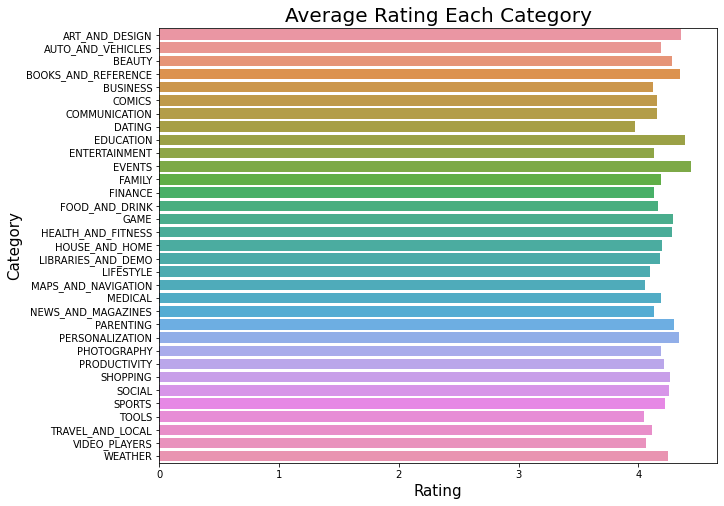

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_ratings, x='Rating', y='Category')
plt.title('Average Rating Each Category', fontsize=20)
plt.xlabel ('Rating', fontsize=15)
plt.ylabel ('Category', fontsize=15)
plt.show()

In [50]:
#print(average ratings)

In [51]:
"Events category is highest rated category"

'Events category is highest rated category'

In [52]:
ps_category_size = wk_ps_df.groupby('Category', as_index=False)['Size(in MB)'].mean()
ps_category_size

,Category,Size(in MB)
0,ART_AND_DESIGN,12.370968
1,AUTO_AND_VEHICLES,20.036807
2,BEAUTY,13.795745
3,BOOKS_AND_REFERENCE,13.310188
4,BUSINESS,14.471877
5,COMICS,13.484869
6,COMMUNICATION,11.765673
7,DATING,16.625555
8,EDUCATION,20.790600
9,ENTERTAINMENT,21.853333


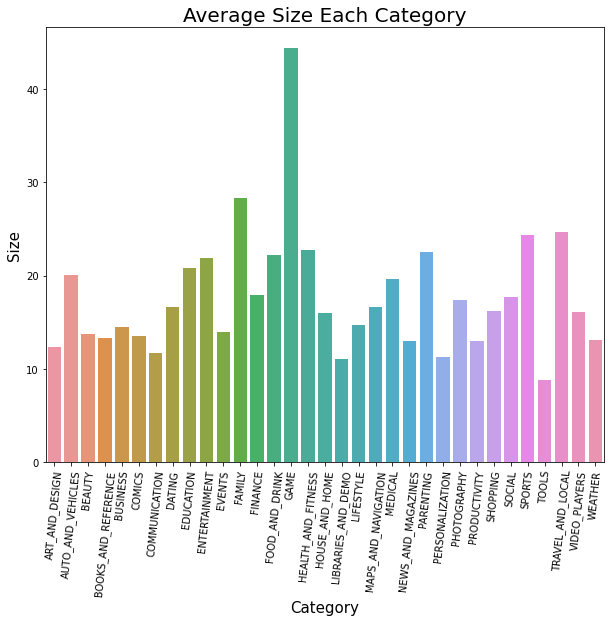

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_size, x='Category', y='Size(in MB)')
plt.title('Average Size Each Category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Size', fontsize=15)
plt.xticks(rotation = 84)
plt.show()

In [54]:
#some of the largest apps from the category falls under games 

In [55]:
ps_category_installs = wk_ps_df.groupby('Category', as_index=False)['Installs'].sum()
ps_category_installs

,Category,Installs
0,ART_AND_DESIGN,124338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1921469576
4,BUSINESS,1001914865
5,COMICS,56086150
6,COMMUNICATION,32647276251
7,DATING,264310807
8,EDUCATION,871452000
9,ENTERTAINMENT,2869160000


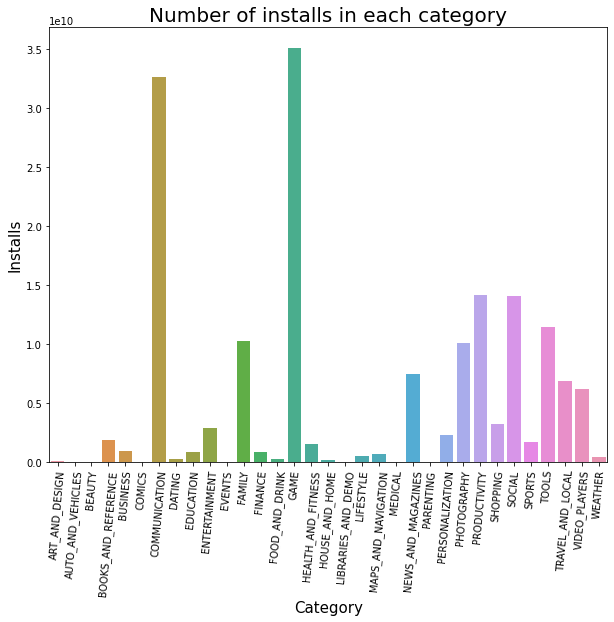

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_installs, x='Category', y='Installs')
plt.title('Number of installs in each category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Installs', fontsize=15)
plt.xticks(rotation = 85)
plt.show()

In [115]:
ps_category_Reviews = wk_ps_df.groupby('Category', as_index=False)['Reviews'].sum()
ps_category_Reviews

,Category,Reviews
0,ART_AND_DESIGN,1714440
1,AUTO_AND_VEHICLES,1163666
2,BEAUTY,396240
3,BOOKS_AND_REFERENCE,21959069
4,BUSINESS,13954552
5,COMICS,3383276
6,COMMUNICATION,815462260
7,DATING,7291278
8,EDUCATION,39595786
9,ENTERTAINMENT,59178154


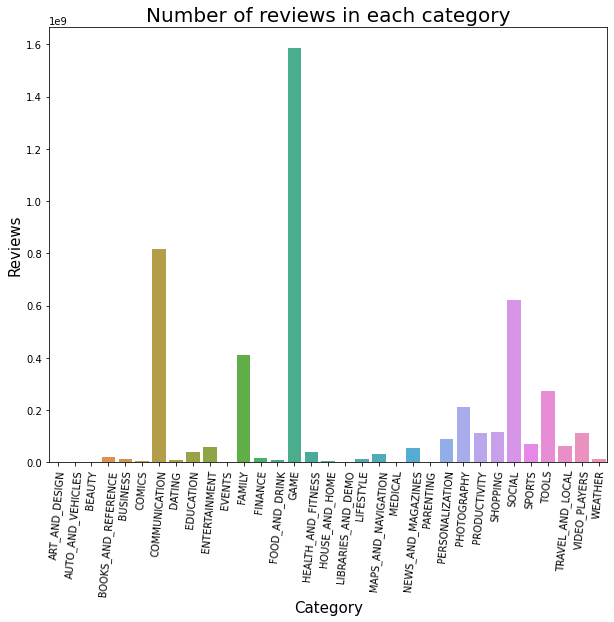

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(data= ps_category_Reviews, x='Category', y='Reviews')
plt.title('Number of reviews in each category', fontsize=20)
plt.xlabel ('Category', fontsize=15)
plt.ylabel ('Reviews', fontsize=15)
plt.xticks(rotation = 85)
plt.show() 

In [111]:
categorically_grouped_db= category_db.groupby('Category').agg({'Size(in MB)':'sum', 'Rating':'mean', 'Installs':'sum','Reviews':'sum'})
categorically_grouped_db

,Size(in MB),Rating,Installs,Reviews
Category,,,,
ART_AND_DESIGN,767.000000,4.358065,124338100,1714440
AUTO_AND_VEHICLES,1502.760547,4.190411,53130211,1163666
BEAUTY,648.400000,4.278571,27197050,396240
BOOKS_AND_REFERENCE,2622.107031,4.346067,1921469576,21959069
BUSINESS,5788.750977,4.121452,1001914865,13954552
COMICS,687.728320,4.155172,56086150,3383276
COMMUNICATION,3117.903320,4.158537,32647276251,815462260
DATING,3524.617578,3.970769,264310807,7291278
EDUCATION,2307.756641,4.389032,871452000,39595786
